<a href="https://colab.research.google.com/github/Elisabet12345/Kumpulan_Tugas_DataMining/blob/main/Breast_Cancer_Wisconsin_(Diagnostic)_K_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Nama : Elisabet Titi Wawin
*   Nim : 202201037
*   Breast Cancer Wisconsin (Diagnostic)_K-NN

Import Librari yang digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Import Dataset

In [ ]:
dataset = pd.read_csv('Breast Cancer Wisconsin (Diagnostic).csv')

In [ ]:
dataset.head ()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
dataset = pd.read_csv('Breast Cancer Wisconsin (Diagnostic).csv')
dataset = dataset.drop(columns=['id', 'Unnamed: 32'], errors='ignore')
dataset['diagnosis'] = dataset['diagnosis'].map({'M': 1, 'B': 0})

x = dataset.iloc[:, 1:].values  # gunakan semua fitur kecuali diagnosis
y = dataset.iloc[:, 0].values   # diagnosis

Spliting dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_latih, x_test, y_latih, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [ ]:
print (x_latih)

[[1.185e+01 1.746e+01 7.554e+01 ... 9.140e-02 3.101e-01 7.007e-02]
 [1.122e+01 1.986e+01 7.194e+01 ... 2.022e-02 3.292e-01 6.522e-02]
 [2.013e+01 2.825e+01 1.312e+02 ... 1.628e-01 2.572e-01 6.637e-02]
 ...
 [9.436e+00 1.832e+01 5.982e+01 ... 5.052e-02 2.454e-01 8.136e-02]
 [9.720e+00 1.822e+01 6.073e+01 ... 0.000e+00 1.909e-01 6.559e-02]
 [1.151e+01 2.393e+01 7.452e+01 ... 9.653e-02 2.112e-01 8.732e-02]]


In [ ]:
print (x_test)

[[1.340e+01 2.052e+01 8.864e+01 ... 2.051e-01 3.585e-01 1.109e-01]
 [1.321e+01 2.525e+01 8.410e+01 ... 6.005e-02 2.444e-01 6.788e-02]
 [1.402e+01 1.566e+01 8.959e+01 ... 8.216e-02 2.136e-01 6.710e-02]
 ...
 [1.234e+01 1.227e+01 7.894e+01 ... 1.070e-01 3.110e-01 7.592e-02]
 [1.353e+01 1.094e+01 8.791e+01 ... 7.407e-02 2.710e-01 7.191e-02]
 [1.959e+01 1.815e+01 1.307e+02 ... 2.247e-01 3.643e-01 9.223e-02]]


In [ ]:
print (y_latih)

[0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1
 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1
 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0
 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1
 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0
 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0
 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1
 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1
 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0]


In [ ]:
print (y_test)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]


Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_latih = sc_x.fit_transform(x_latih)
x_test = sc_x.transform(x_test)

Traning the K-NN Model on the Traning set

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_latih, y_latih)

KNeighborsClassifier()

Predicting the Test Set Result

In [ ]:
y_prediksi = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
hasil_cm = confusion_matrix(y_test, y_prediksi)
print("Confusion Matrix:\n", hasil_cm)

Confusion Matrix:
 [[89  1]
 [ 6 47]]


In [ ]:
from sklearn.metrics import accuracy_score
akurasi = accuracy_score(y_test, y_prediksi)
print("Tingkat Akurasi : %d persen" % (akurasi * 100))

Tingkat Akurasi : 95 persen


<ipython-input-50-cc0a58d3a65a>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_data[y_data == j, 0], x_data[y_data == j, 1],


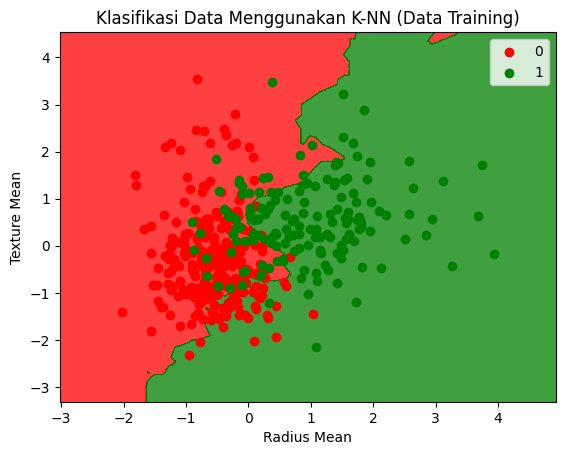

In [ ]:
from matplotlib.colors import ListedColormap
x_data, y_data = x_latih, y_latih
x_one, x_two = np.meshgrid(np.arange(start = x_data[:, 0].min() - 1, stop = x_data[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_data[:, 1].min() - 1, stop = x_data[:, 1].max() + 1, step = 0.01))
plt.contourf(
    x1, x2,
    classifier_pca.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
    alpha=0.75,
    cmap=ListedColormap(('red', 'green'))
)
plt.xlim(x_one.min(), x_one.max())
plt.ylim(x_two.min(), x_two.max())
for i, j in enumerate(np.unique(y_data)):
  plt.scatter(x_data[y_data == j, 0], x_data[y_data == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data Menggunakan K-NN (Data Training)')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.legend()
plt.show()

<ipython-input-51-dbb3dd5fd1e7>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_data[y_data == j, 0], x_data[y_data == j, 1],


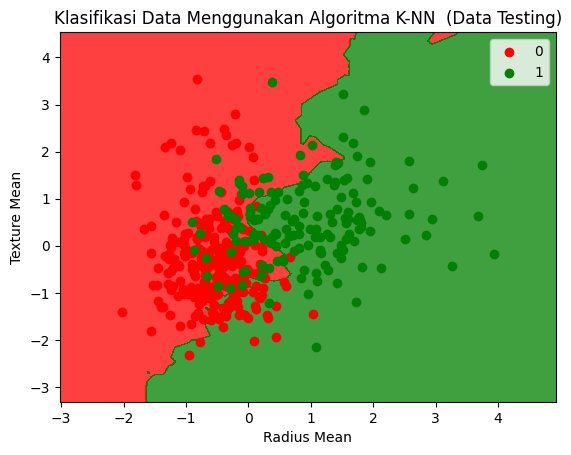

In [ ]:
from matplotlib.colors import ListedColormap
x_data, y_data = x_latih, y_latih
x_one, x_two = np.meshgrid(np.arange(start = x_data[:, 0].min() - 1, stop = x_data[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_data[:, 1].min() - 1, stop = x_data[:, 1].max() + 1, step = 0.01))
plt.contourf(
    x1, x2,
    classifier_pca.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
    alpha=0.75,
    cmap=ListedColormap(('red', 'green'))
)
plt.xlim(x_one.min(), x_one.max())
plt.ylim(x_two.min(), x_two.max())
for i, j in enumerate(np.unique(y_data)):
  plt.scatter(x_data[y_data == j, 0], x_data[y_data == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data Menggunakan Algoritma K-NN  (Data Testing)')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.legend()
plt.show()